## Google Drive Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 적절한 데이터를 사용했는가?



## Data Loading : white-wine quality

In [ ]:
import pandas as pd
white_wine = '/content/drive/Shareddrives/22-1 데이터마이닝/data_week3/wine/winequality-white.csv'
white_wine_origin = pd.read_csv(white_wine, sep=';') # original dataset

## 데이터에 대한 설명

위 데이터는 포르투갈의 vinho verde 와인의 여러 화학적 특성에 관한 데이터이다.

그 중에서도 분석결과가 많은 레드와인이 아닌 화이트 와인의 데이터를 선택하였다.

 Vinho verde는 포도 품종의 이름은 아니며, 한국으로 예시를 들자면 일종의 지리적 농산물/특산품 표시제라고 이해할 수 있다.


Wine certification 과정에서는 물리화학적 테스트와 미각적 테스트가 함께 진행된다.

물리화학적 테스트 과정에서는 밀도, 도수, pH 등 와인의 고유한 화학적 성질들을 연구실에서 측정한다.

미각 테스트에서는 주로 와인 전문가들이 평가를 내리게 되며, 아무래도 개인의 주관이 들어갈 수 있다는 특징이 있다.

해당 데이터에서는 프라이버시와 물류 관련 문제로 인해 포도의 품종이나 와인 브랜드 및 와인 가격 등의 데이터는 배제되었으며, 11개의 화학적 데이터와 1개의 미각 데이터를 제공하고 있다.

이 중 미각 데이터의 경우 일종의 Target으로 작용하는 Feature에 해당하므로, PCA 및 FA로 공통되는 특성을 묶어야 하기 때문에 배제하였다.

## 변수에 대한 설명

- fixed acidity(결합산) : 와인의 산도를 제어한다. g(tartaric acid)/dm^3
- volatile acidity(휘발산) : 와인의 향에 연관이 많다. g(acetic acid)/dm^3
- citric acid(구연산) : 와인의 신선함을 유지시켜주는 역할을 하며, 산성화에 연관을 미친다. g/dm^3
- residual sugar(잔여 설탕) : 와인의 단맛을 올려준다. g/dm^3
- chlorides(염소) : 와인의 짠맛과 신맛을 좌우하는 성분이다. g(sodium chloride)/dm^3
- free sulfur dioxide / total sulfur dioxide / sulphates(황 화합물) : 특정 박테리아와 효모를 죽여 와인의 보관도를 높여준다. mg/dm^3 mg/dm^3 g(potassium sulphate)/dm^3
- density(밀도) : 바디의 높고 낮음을 표현하는 와인의 바디감을 의미한다. g/dm^3
- pH(산성도) : 와인의 신맛의 정도를 나타낸다. 
- alcohol(알코올) : 와인에 단맛을 주며 바디감에 영향을 준다. %vol

- tartaric acid: 타타르산/주석산
- acetic acid: 아세트산/초산
- quality : survey로 조사한 와인에 대한 소비자의 평가 (0~10점) -> Target변수로 바로 배제되었다.

# Installation & Importing



In [ ]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

     |████████████████████████████████| 41 kB 429 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=76ecbd1c48307915296f8b4787f5b7f1e7f235adba665c81d72916f28ed7fe1a
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

# EDA

Dataset을 활용해 본격적으로 PCA와 FA를 진행하기 이전에 각 Feature들의 분포가 치우치지는 않았는지 확인하고, 치우친 경우에는 적절한 변환과정을 거쳐야 한다.

또한 Outlier가 있을 것으로 예상되는 Feature의 경우는 Box-plot 등으로 시각화하여 outlier를 탐색해보고, 이를 해당 데이터 분포의 평균 혹은 중앙값 등으로 대체하는 과정이 필요하다.

위의 전처리 과정을 거치면 이후에 StandardScalar() 함수를 활용해 표준화한 분포를 PCA와 FA에 활용할 수 있게 된다.

## Target Data Drop

PCA나 FA를 진행하는 데에는 별도의 Target data를 필요로 하지 않는다.

해당 데이터셋은 일종의 Target 변수인 'quality'를 가지고 있기에 해당 열의 데이터를 제거해준 후에 PCA를 진행하여야 한다.

In [ ]:
white_wine_origin = white_wine_origin.drop(['quality'], axis=1)
white_wine_origin

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


## Transformation (skewness 조절)

data의 skew 값을 파악해야 normalization을 진행할 feature를 확인 가능하다. 아래와 같이 skew값이 1보다 큰 값으로 moderately skewed를 벗어나는 feature들을 탐색 가능하다.

In [ ]:
white_wine_origin.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

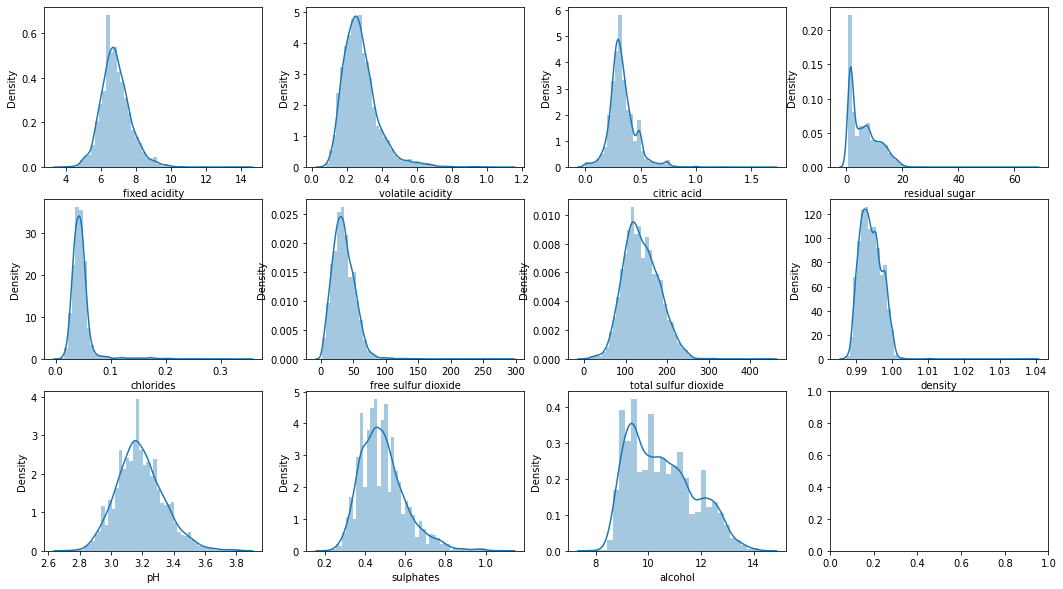

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18, 10))

sns.distplot(white_wine_origin['fixed acidity'], ax=ax[0,0])
sns.distplot(white_wine_origin['volatile acidity'], ax=ax[0,1])
sns.distplot(white_wine_origin['citric acid'], ax=ax[0,2])
sns.distplot(white_wine_origin['residual sugar'], ax=ax[0,3])
sns.distplot(white_wine_origin['chlorides'], ax=ax[1,0])
sns.distplot(white_wine_origin['free sulfur dioxide'], ax=ax[1,1])
sns.distplot(white_wine_origin['total sulfur dioxide'], ax=ax[1,2])
sns.distplot(white_wine_origin['density'], ax=ax[1,3])
sns.distplot(white_wine_origin['pH'], ax=ax[2,0])
sns.distplot(white_wine_origin['sulphates'], ax=ax[2,1])
sns.distplot(white_wine_origin['alcohol'], ax=ax[2,2])

In [ ]:
eda = white_wine_origin.agg(['skew', 'kurtosis']).transpose().copy()
eda[eda['skew'] > 1]

,skew,kurtosis
volatile acidity,1.576980,5.091626
citric acid,1.281920,6.174901
residual sugar,1.077094,3.469820
chlorides,5.023331,37.564600
free sulfur dioxide,1.406745,11.466342


위에서 등장한 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide'에 대해서는 plot을 그려보고, 어느 방향으로 skewed 되었는지를 파악한 후에 적절한 변환을 해서 normal한 분포에 가깝게 변환해주는 과정을 거쳐야 한다. 우선 시각화를 위한 라이브러리들을 import 해주자.

### volatile acidity transformation to make -1 < skew < 1

가장 먼저 volatile acidity의 경우 약 1.57 정도의 skew값을 가지고, plot을 그려보면 rightly skewed한 데이터임을 확인 가능하다.(좌측) 따라서 Square Root를 이용하여 우측과 같이 변환을 해주게 되면 skewness가 해소된 모습을 관찰 가능하다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


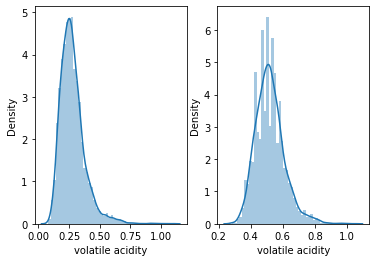

In [ ]:
fig, ax = plt.subplots(ncols=2)

sns.distplot(white_wine_origin['volatile acidity'], ax=ax[0])
sns.distplot(np.sqrt(white_wine_origin['volatile acidity']), ax=ax[1])

실제로 np.sqrt를 이용하여 skew값을 변환 후 변화된 값을 출력해보자.

In [ ]:
white_wine_origin['volatile acidity'] = np.sqrt(white_wine_origin['volatile acidity'])
white_wine_origin['volatile acidity'].agg(['skew', 'kurtosis']).transpose()

skew        0.788321
kurtosis    1.606658
Name: volatile acidity, dtype: float64

skew값이 0.78 < 1 이므로 moderately skewed한 범위 내로 들어온 것을 확인 가능하다.

### citric acid transformation to make -1 < skew < 1

가장 먼저 citric acid의 경우 약 1.28정도의 skew값을 가지고, plot을 그려보면 rightly skewed한 데이터임을 확인 가능하다.(좌측) 따라서 Square Root를 이용하여 우측과 같이 변환을 해주게 되면 skewness가 해소된 모습을 관찰 가능하다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


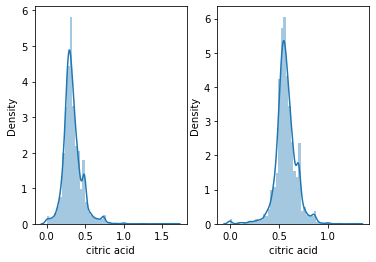

In [ ]:
fig, ax = plt.subplots(ncols=2)

sns.distplot(white_wine_origin['citric acid'], ax=ax[0])
sns.distplot(np.sqrt(white_wine_origin['citric acid']), ax=ax[1])

실제로 np.sqrt를 이용하여 skew값을 변환 후 변화된 값을 출력해보자.

In [ ]:
white_wine_origin['citric acid'] = np.sqrt(white_wine_origin['citric acid'])
white_wine_origin['citric acid'].agg(['skew', 'kurtosis']).transpose()

skew       -0.426845
kurtosis    4.786500
Name: citric acid, dtype: float64

skew값이 -0.42 > -1 이므로 moderately skewed한 범위 내로 들어온 것을 확인 가능하다.

### residual sugar transformation to make -1 < skew < 1

가장 먼저 residual sugar의 경우 약 1.07정도의 skew값을 가지고, plot을 그려보면 rightly skewed한 데이터임을 확인 가능하다.(좌측) 따라서 Square Root를 이용하여 우측과 같이 변환을 해주자. 다만 초기 데이터의 분포가 중앙을 기준으로 고르게 분포한 형태가 아니기 때문에 2에 해당하는 density 값이 주변에 비해 다소 낮은 형태의 그래프가 그려진다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


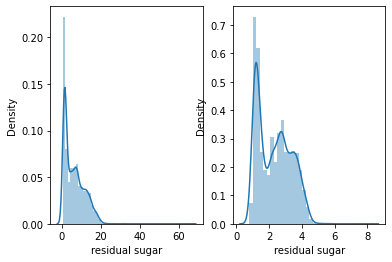

In [ ]:
fig, ax = plt.subplots(ncols=2)

sns.distplot(white_wine_origin['residual sugar'], ax=ax[0])
sns.distplot(np.sqrt(white_wine_origin['residual sugar']), ax=ax[1])

실제로 np.sqrt를 이용하여 skew값을 변환 후 변화된 값을 출력해보자.

In [ ]:
white_wine_origin['residual sugar'] = np.sqrt(white_wine_origin['residual sugar'])
white_wine_origin['residual sugar'].agg(['skew', 'kurtosis']).transpose()

skew        0.316203
kurtosis   -0.943649
Name: residual sugar, dtype: float64

skew값이 0.31 < 1 이므로 moderately skewed한 범위 내로 들어온 것을 확인 가능하다.

### chlorides transformation to make -1 < skew < 1

네 번째로 chlorides의 경우 약 5.02의 다소 큰 skew값을 가지고, plot을 그려보면 rightly skewed한 데이터임을 확인 가능하다.(좌측) 따라서 Square Root보다 log10을 이용하여 우측과 같이 변환을 해주자.chlorides의 경우 앞선 describe를 통해 min 값이 0보다 크므로 log 변환이 가능하다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


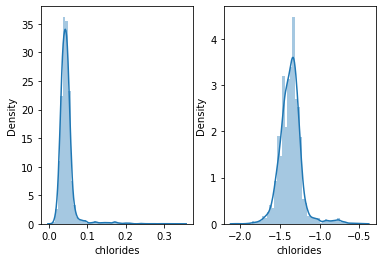

In [ ]:
fig, ax = plt.subplots(ncols=2)

sns.distplot(white_wine_origin['chlorides'], ax=ax[0])
sns.distplot(np.log10(white_wine_origin['chlorides']), ax=ax[1])

위의 그림으로 skew값이 많이 해결되었음이 관찰 가능하다.
하지만 초기 skew 값이 컸기 때문에 test1이라는 dummy data에 log10으로 변환한 데이터를 저장해 그 skewness를 판단해보면 아래와 같다.

In [ ]:
test1 = np.log10(white_wine_origin['chlorides']).copy()
test1.agg(['skew', 'kurtosis', 'min', 'max']).transpose()

skew        1.134134
kurtosis    5.300009
min        -2.045757
max        -0.460924
Name: chlorides, dtype: float64

skew값이 아직도 1보다 미세하게 크기 때문에 한 번 더 log10 변환을 적용해주면 1보다 작아질 것으로 예상 가능하다.   

 log10을 한 번 더 적용하기 위해서는 min값을 0보다 크게 만들어야 하고, ndarray 객체 test1에 아래와 같이 2.1을 더한 후에 다시 log10변환을 취해준 후 test2 dummy 변수에 저장해준다.

log가 아닌 log10을 사용한 이유는 log보다 log10을 사용할 경우 최초 로그변환으로 얻어지는 음수 y값들의 범위가 더 0에 가깝게 분포하기 때문에 추후에 더해지는 2.1이라는 숫자의 크기를 최소화 할 수 있다는 장점이 있기 때문이었다. 작은 수를 더함으로써 데이터의 분포에 최소한의 영향을 주고자 하였다.

In [ ]:
test2 = np.log10(test1+2.1).copy()
test2.agg(['skew', 'kurtosis', 'min', 'max']).transpose()

skew       -0.847299
kurtosis    9.464607
min        -1.265660
max         0.214599
Name: chlorides, dtype: float64

드디어 skew 값이 moderately skewd 범위 내에 들어온 것을 확인했다. 따라서 원래 데이터의 값들을 test2의 값들로 치환해주면 아래와 같다.

In [ ]:
white_wine_origin['chlorides'] = test2
white_wine_origin['chlorides'].agg(['skew', 'kurtosis', 'min', 'max']).transpose()

skew       -0.847299
kurtosis    9.464607
min        -1.265660
max         0.214599
Name: chlorides, dtype: float64

skew값이 moderately skewed 범위인 -1과 1 사이에 들어왔음을 확인 가능하다.

### free sulfur dioxide transformation to make -1 < skew < 1

마지막으로 free sulfur dioxide의 경우 약 1.40의 skew값을 가지고, plot을 그려보면 rightly skewed한 데이터임을 확인 가능하다.(좌측) 따라서 Square Root를 이용하여 우측과 같이 변환을 해주자.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


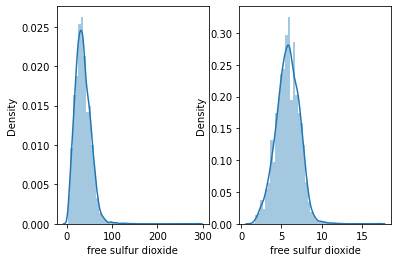

In [ ]:
fig, ax = plt.subplots(ncols=2)

sns.distplot(white_wine_origin['free sulfur dioxide'], ax=ax[0])
sns.distplot(np.sqrt(white_wine_origin['free sulfur dioxide']), ax=ax[1])

치우침이 많이 사라진 것을 확인 가능하다. 실제로 np.sqrt를 이용하여 skew값을 변환 후 변화된 값을 출력해보자.

In [ ]:
white_wine_origin['free sulfur dioxide'] = np.sqrt(white_wine_origin['free sulfur dioxide'])
white_wine_origin['free sulfur dioxide'].agg(['skew', 'kurtosis']).transpose()

skew        0.049692
kurtosis    0.841695
Name: free sulfur dioxide, dtype: float64

skew값이 0.04 < 1 이므로 moderately skewed한 범위 내로 들어온 것을 확인 가능하다.

### 따라서 변화된 skewness를 확인해보면 아래와 같다.

In [ ]:
white_wine_origin.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
fixed acidity,0.647751,2.172178
volatile acidity,0.788321,1.606658
citric acid,-0.426845,4.786500
residual sugar,0.316203,-0.943649
chlorides,-0.847299,9.464607
free sulfur dioxide,0.049692,0.841695
total sulfur dioxide,0.390710,0.571853
density,0.977773,9.793807
pH,0.457783,0.530775
sulphates,0.977194,1.590930


기존에 Skew 값이 5 이상으로 가장 컸던 chlorides까지도 모두 그 크기가 1보다 작게 만드는 데 성공했다.

 결과적으로 변환된 white_wine_origin 이라는 데이터는 그 minimum 값과 maximum 값의 scale만 조절하면
 
  데이터셋의 모든 Feature data가 정규분포에 근사한 분포를 따른다고 할 수 있게 된다.

## Outlier Detection

기존에 Outlier Detection을 진행하였으나, Outlier 값 자체를 변환하게 되면 오히려 KMO 값이 낮아지는 관계로 본 실습에서는 Outlier들의 존재만을 확인하고, 이 값을 다른 값으로 대체하지는 않았다.

Outliers를 찾아내기 위한 함수를 정의하고 어떻게 분포하는 지의 형태만 파악해보면 아래와 같다.

### Outlier Detection 함수 정의

In [ ]:
# IQR 방식의 Outlier detection
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    # global lower, upper    
    
    # 4분위수 정의
    q1, q3 = np.nanpercentile(data[column], [25,75])          
    
    # IQR
    iqr = q3 - q1              
    
    # lower와 upper bound 값 구하기     
    lower, upper = q1 - iqr * 1.5, q3 + iqr * 1.5     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 이상치 데이터 종류 별로 저장
    up_outlier = data[data[column] > upper].copy()     
    down_outlier = data[data[column] < lower].copy()    
    
    # Total Outlier 탐지
    return print('이상치는 큰 이상치 {}개와 작은 이상치 {}개로 총 {}개 이다.'.format(up_outlier.shape[0], down_outlier.shape[0], up_outlier.shape[0] + down_outlier.shape[0] ))

### 각 변수의 Outlier 상태 파악해보기

In [ ]:
# fixed acidity
outlier_iqr(white_wine_origin, 'fixed acidity')

IQR은 1.0 이다.
lower bound 값은 4.8 이다.
upper bound 값은 8.8 이다.
이상치는 큰 이상치 105개와 작은 이상치 14개로 총 119개 이다.


In [ ]:
# volatile acidity
outlier_iqr(white_wine_origin, 'volatile acidity')

IQR은 0.10742785545365402 이다.
lower bound 값은 0.29711578631510294 이다.
upper bound 값은 0.726827208129719 이다.
이상치는 큰 이상치 136개와 작은 이상치 5개로 총 141개 이다.


In [ ]:
# citric acid
outlier_iqr(white_wine_origin, 'citric acid')

IQR은 0.10488455756917658 이다.
lower bound 값은 0.36228840591689837 이다.
upper bound 값은 0.7818266361936047 이다.
이상치는 큰 이상치 143개와 작은 이상치 136개로 총 279개 이다.


In [ ]:
# residual sugar
outlier_iqr(white_wine_origin, 'residual sugar')

IQR은 1.8425860634699252 이다.
lower bound 값은 -1.460038614164358 이다.
upper bound 값은 5.910305639715343 이다.
이상치는 큰 이상치 1개와 작은 이상치 0개로 총 1개 이다.


In [ ]:
# chlorides
outlier_iqr(white_wine_origin, 'chlorides')

IQR은 0.0854264158480387 이다.
lower bound 값은 -0.31103556468142435 이다.
upper bound 값은 0.03067009871073048 이다.
이상치는 큰 이상치 123개와 작은 이상치 148개로 총 271개 이다.


In [ ]:
# free sulfur dioxide
outlier_iqr(white_wine_origin, 'free sulfur dioxide')

IQR은 1.986498459812549 이다.
lower bound 값은 1.8160838335938956 이다.
upper bound 값은 9.762077672844091 이다.
이상치는 큰 이상치 24개와 작은 이상치 11개로 총 35개 이다.


In [ ]:
# total sulfur dioxide
outlier_iqr(white_wine_origin, 'total sulfur dioxide')

IQR은 59.0 이다.
lower bound 값은 19.5 이다.
upper bound 값은 255.5 이다.
이상치는 큰 이상치 14개와 작은 이상치 5개로 총 19개 이다.


In [ ]:
# density
outlier_iqr(white_wine_origin, 'density')

IQR은 0.004377499999999923 이다.
lower bound 값은 0.9851562500000002 이다.
upper bound 값은 1.0026662499999999 이다.
이상치는 큰 이상치 5개와 작은 이상치 0개로 총 5개 이다.


In [ ]:
# pH
outlier_iqr(white_wine_origin, 'pH')

IQR은 0.18999999999999995 이다.
lower bound 값은 2.8049999999999997 이다.
upper bound 값은 3.5649999999999995 이다.
이상치는 큰 이상치 66개와 작은 이상치 9개로 총 75개 이다.


In [ ]:
# sulphates
outlier_iqr(white_wine_origin, 'sulphates')

IQR은 0.14000000000000007 이다.
lower bound 값은 0.19999999999999987 이다.
upper bound 값은 0.7600000000000001 이다.
이상치는 큰 이상치 124개와 작은 이상치 0개로 총 124개 이다.


In [ ]:
# alcohol
outlier_iqr(white_wine_origin, 'alcohol')

IQR은 1.9000000000000004 이다.
lower bound 값은 6.6499999999999995 이다.
upper bound 값은 14.25 이다.
이상치는 큰 이상치 0개와 작은 이상치 0개로 총 0개 이다.


## 정규화 (StandardScaler)

앞서 데이터의 skewness를 조정하고, outlier를 찾아서 바꾸는 과정을 거쳤다.

 해당 단계에서는 sklearn의 StandardScaler 함수를 활용하여 최종적으로 분석에 활용할 'data_scale'을 얻게 된다.

In [ ]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(white_wine_origin), columns=white_wine_origin.columns, index = white_wine_origin.index)

data_scale은 StandardScaler 객체에 white_wine_origin이라는 dataset을 바탕으로 훈련시킨 데이터이기 때문에 그 평균이 0에 가까워졌을 것이다. 이를 확인하기위해 아래처럼 상위 5개의 Feature에 대한 평균 값이 예상대로 변화했는 지 확인해본다.

In [ ]:
data_scale.mean(axis=0).head()

fixed acidity       7.584333e-17
volatile acidity   -2.620516e-16
citric acid        -1.652890e-15
residual sugar     -3.112160e-16
chlorides           2.731811e-16
dtype: float64

단순 평균 뿐만 아니라 전체적인 분포의 개형을 판단해보기 위해 distplot을 이용해 나타내보면 아래와 같다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

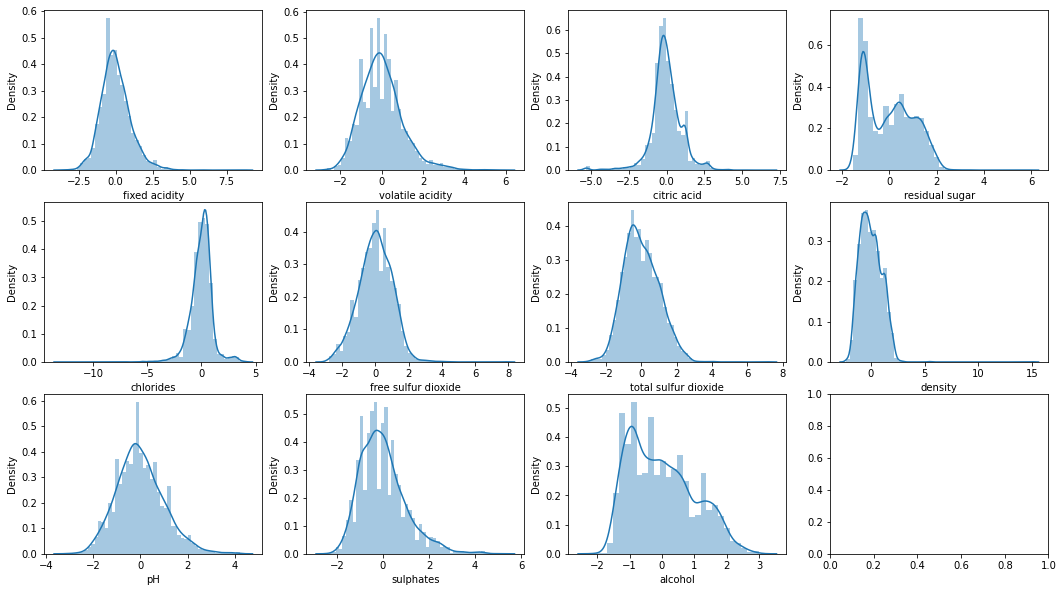

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18, 10))

sns.distplot(data_scale['fixed acidity'], ax=ax[0,0])
sns.distplot(data_scale['volatile acidity'], ax=ax[0,1])
sns.distplot(data_scale['citric acid'], ax=ax[0,2])
sns.distplot(data_scale['residual sugar'], ax=ax[0,3])
sns.distplot(data_scale['chlorides'], ax=ax[1,0])
sns.distplot(data_scale['free sulfur dioxide'], ax=ax[1,1])
sns.distplot(data_scale['total sulfur dioxide'], ax=ax[1,2])
sns.distplot(data_scale['density'], ax=ax[1,3])
sns.distplot(data_scale['pH'], ax=ax[2,0])
sns.distplot(data_scale['sulphates'], ax=ax[2,1])
sns.distplot(data_scale['alcohol'], ax=ax[2,2])

 초기 데이터 분포의 특이성으로 인한 residual sugar 데이터 이외에는 모두 정규분포에 유사한 개형을 띄고 있는 점을 확인할 수 있다.

다음으로는 전처리를 완료한 date_scale 데이터셋에 대해서 각 feature끼리의 covariance를 확인해 볼 필요가 있다.

 이를 나타낸 결과는 아래와 같다.

In [ ]:
data_scale.cov() # 공분산행렬

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000204,-0.025239,0.306761,0.081626,0.066946,-0.053723,0.091088,0.265385,-0.425945,-0.017146,-0.120906
volatile acidity,-0.025239,1.000204,-0.203133,0.088912,0.009823,-0.099601,0.105277,0.026703,-0.042979,-0.039824,0.068650
citric acid,0.306761,-0.203133,1.000204,0.084138,0.079825,0.095809,0.120202,0.140139,-0.166925,0.067091,-0.054172
residual sugar,0.081626,0.088912,0.084138,1.000204,0.186949,0.328409,0.418930,0.810280,-0.191214,-0.033003,-0.435239
chlorides,0.066946,0.009823,0.079825,0.186949,1.000204,0.153276,0.322498,0.423522,-0.051406,0.059436,-0.522360
free sulfur dioxide,-0.053723,-0.099601,0.095809,0.328409,0.153276,1.000204,0.619532,0.298604,0.008529,0.059553,-0.245244
total sulfur dioxide,0.091088,0.105277,0.120202,0.418930,0.322498,0.619532,1.000204,0.529990,0.002321,0.134590,-0.448984
density,0.265385,0.026703,0.140139,0.810280,0.423522,0.298604,0.529990,1.000204,-0.093611,0.074508,-0.780297
pH,-0.425945,-0.042979,-0.166925,-0.191214,-0.051406,0.008529,0.002321,-0.093611,1.000204,0.155983,0.121457
sulphates,-0.017146,-0.039824,0.067091,-0.033003,0.059436,0.059553,0.134590,0.074508,0.155983,1.000204,-0.017436


## 추가 Drop 할 변수 판단

기존에 진행했던 방법만으로 KMO 값 달성이 어려워 추가적으로 변수를 제외하는 방법도 채택하게 되었다. 일부 상관관계가 크게 없다고 판단되는 변수를 제외한 후 KMO값이 소폭 상승하는 효과가 있었다.

다음으로는 전처리를 완료한 date_scale 데이터셋에 대해서 각 feature끼리의 correlation을 확인해 볼 필요가 있다.

 이를 나타낸 결과는 아래와 같다.

In [ ]:
data_scale.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.025234,0.306698,0.081610,0.066932,-0.053712,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.025234,1.000000,-0.203092,0.088894,0.009821,-0.099581,0.105256,0.026697,-0.042970,-0.039816,0.068636
citric acid,0.306698,-0.203092,1.000000,0.084121,0.079808,0.095790,0.120177,0.140110,-0.166891,0.067078,-0.054161
residual sugar,0.081610,0.088894,0.084121,1.000000,0.186911,0.328342,0.418844,0.810115,-0.191175,-0.032996,-0.435150
chlorides,0.066932,0.009821,0.079808,0.186911,1.000000,0.153244,0.322432,0.423436,-0.051395,0.059424,-0.522254
free sulfur dioxide,-0.053712,-0.099581,0.095790,0.328342,0.153244,1.000000,0.619406,0.298543,0.008528,0.059541,-0.245194
total sulfur dioxide,0.091070,0.105256,0.120177,0.418844,0.322432,0.619406,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.026697,0.140110,0.810115,0.423436,0.298543,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.042970,-0.166891,-0.191175,-0.051395,0.008528,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.039816,0.067078,-0.032996,0.059424,0.059541,0.134562,0.074493,0.155951,1.000000,-0.017433


모든 correlation 값이 0.3보다 작은 변수를 찾아보자.

`volatile acidity`의 경우 최대치인 citric acid(-0.2)를 포함, 모두 매우 낮은 상관관계를 가진 것으로 나타난다.

`sulphates` 역시 특별히 상관관계가 깊은 다른 변수가 존재하지 않는다.

따라서 이 둘을 기존 data에서 drop해본다.

In [ ]:
data_scale = data_scale.drop(['volatile acidity', 'sulphates'], axis=1)
data_scale.shape

(4898, 9)

In [ ]:
data_scale.corr()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
fixed acidity,1.000000,0.306698,0.081610,0.066932,-0.053712,0.091070,0.265331,-0.425858,-0.120881
citric acid,0.306698,1.000000,0.084121,0.079808,0.095790,0.120177,0.140110,-0.166891,-0.054161
residual sugar,0.081610,0.084121,1.000000,0.186911,0.328342,0.418844,0.810115,-0.191175,-0.435150
chlorides,0.066932,0.079808,0.186911,1.000000,0.153244,0.322432,0.423436,-0.051395,-0.522254
free sulfur dioxide,-0.053712,0.095790,0.328342,0.153244,1.000000,0.619406,0.298543,0.008528,-0.245194
total sulfur dioxide,0.091070,0.120177,0.418844,0.322432,0.619406,1.000000,0.529881,0.002321,-0.448892
density,0.265331,0.140110,0.810115,0.423436,0.298543,0.529881,1.000000,-0.093591,-0.780138
pH,-0.425858,-0.166891,-0.191175,-0.051395,0.008528,0.002321,-0.093591,1.000000,0.121432
alcohol,-0.120881,-0.054161,-0.435150,-0.522254,-0.245194,-0.448892,-0.780138,0.121432,1.000000


다시 correlation의 값들을 확인해보자. 이제는 모든 변수가 0.3 이상의 correlation을 적어도 하나 가지는 것을 확인 가능하다.

# **Principal Component Analysis**

## Principle component 수 선택

본격적으로 PCA를 진행하려면 Principal Component의 수를 몇 개로 설정하는 것이 최선인지를 판단해야 한다.

이를 판단하는 방법에는 대표적으로 세 가지가 존재한다.

첫 번째는 각 Feature의 Eigenvalue를 계산하여 이 값이 1보다 크거나 같은 개수(차원) 만큼 PC의 수를 설정하는 방식이다.

두 번째는 Eigenvalue를 그래프 상에 나타낸 Scree Plot에서 차원(변수의 수)이 하나 커질 때마다 기울기의 변화를 살피고, 급격한 변화가 존재하는 지점을 기준으로 PC의 개수를 설정한다.

세 번째는 Total Variance는 선형 변환을 하더라도 변하지 않기 때문에 이를 80% 이상 설명하도록 하려면 과연 몇 개의 PC가 필요한 지 고려하는 방식이다.

In [ ]:
# PCA 진행
pca = PCA(random_state=312)
X_p = pca.fit_transform(data_scale)

###방안 1. Eigen value가 1 이상일 때까지

In [ ]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None)  
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [3.34246967 1.56417423 1.08031809 0.91004315 0.75838878 0.59269342
 0.39539543 0.31949836 0.03701886] 

적합한 PC 개수: 3


FactorAnalyzer 객체의 `get_eigenvalues()`를 활용하여 Eigenvalue를 계산하고, 조건인 1 이상을 만족하는 PC의 개수를 찾아보면 적합한 PC 개수는 5개라는 결과를 얻는다.

###방안 2. Scree plot 그래프 기울기가 완만해지기 전까지
Scree plot: 고유값-주성분의 분산 변화를 보는 그래프로, 고유값 변화율이 완만해지는 부분이 필요한 주성분의 수

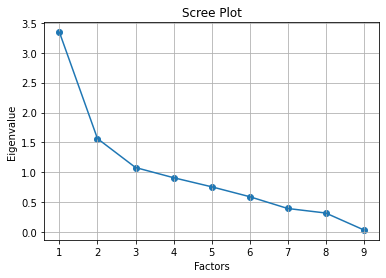

In [ ]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

기울기를 산점도와 이를 이은 그래프로 시각화했지만, 시각으로만 판단하기에는 그 기준점이 애배할 수 있다.

따라서 이를 객관화 하기위해 아래처럼 단위 차원 증가에 따른 기울기의 변화를 절댓값 수치로 표현하였고, 4 -> 5 부분 이후로 기울기가 완만하게 나타나기 때문에 완만해지기 전이 3까지 사용하는 것이 바람직해 보인다.

In [ ]:
# 기울기 확인

for i in range(0, len(ev)-1):
    slope = abs( (ev[i] - ev[i+1])/1 )
    print('{:2} -> {:2} : {:0.3f}'.format(i+1, i+2, slope))

 1 ->  2 : 1.778
 2 ->  3 : 0.484
 3 ->  4 : 0.170
 4 ->  5 : 0.152
 5 ->  6 : 0.166
 6 ->  7 : 0.197
 7 ->  8 : 0.076
 8 ->  9 : 0.282


### 분산 설명 비율



In [ ]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [0.37138552 0.17379714 0.12003534 0.10111591 0.08426542 0.06585482
 0.04393283 0.03549982 0.00411321]
누적 분산 설명 비율:
 [0.37138552 0.54518266 0.665218   0.7663339  0.85059932 0.91645415
 0.96038697 0.99588679 1.        ]


PC 3까지 채택할 경우, 누적 분산 설명 비율은 약 66%

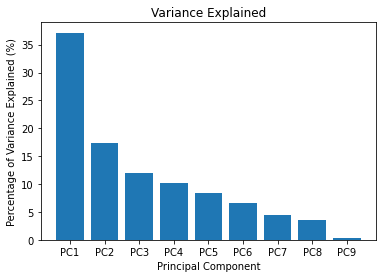

In [ ]:
# 시각화 2
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

### 방안 3. 약 80% 이상의 분산을 설명하는 PC 건수 채택

In [ ]:
d = np.argmax(cumsum >= 0.80) +1 #누적된 설명가능한 분산의 비율이 0.85 이상
print('적합한 PC 개수:', d) # 5개 선택 (PC5까지 활용)

적합한 PC 개수: 5


## PCA 진행
- 방안 1, 2에서 공통적으로 3개, 방안 3에서 5개로 나타났기 때문에 PC는 총 3까지 사용하여 진행해보고자 한다.

In [ ]:
# 각 PC를 이루는 변수들의 조합 구성 (5개): Eigen Vector
# pca.components_[n_components, n_features]
# 수정된 data_scale의 column을 index로하고 pc변수를 Column으로 하는 table
pd.DataFrame(pca.components_[:,:3], 
             columns = ['PC1','PC2','PC3'], 
             index=data_scale.columns)

,PC1,PC2,PC3
fixed acidity,0.148664,0.125533,0.410256
citric acid,0.623489,0.402433,-0.021195
residual sugar,0.048046,0.429483,-0.025282
chlorides,-0.036768,-0.479967,0.516606
free sulfur dioxide,-0.098226,0.530102,0.339581
total sulfur dioxide,0.687839,-0.335291,-0.221581
density,-0.181132,0.110583,-0.415344
pH,-0.197810,0.039625,0.003003
alcohol,-0.175472,-0.015425,-0.476222


In [ ]:
# X_p = pca.fit_transform(data_scale)
# 기존 data_scale의 index와 pc변수 결합 table
X_pp = pd.DataFrame(X_p[:,:3], 
                    columns = ['PC1','PC2','PC3'], 
                    index = data_scale.index)

X_pp # PCA 이후 만들어진 data (PC1~ PC5로 총 5개 변수로 축소)

,PC1,PC2,PC3
0,3.455907,0.483121,-0.325166
1,-0.573127,-0.410463,-1.322201
2,0.403099,1.088184,-0.547783
3,1.736961,-0.288453,0.223298
4,1.736961,-0.288453,0.223298
...,...,...,...
4893,-2.045929,-0.456303,-0.414957
4894,1.455543,-0.475607,0.640168
4895,-0.748497,0.159250,-1.092052
4896,-3.881931,-1.003812,1.055857


## PC 해석하기

### score plot
- 주성분과 원 데이터 간의 관계를 보여주는 그래프
- 정규분포를 따르고 이상치가 없는 경우, 두 주성분 간 Correlation이 강하지 않은 경우 0 주위로 무작위의 형태로 점이 찍힘.
- 각 주성분이 어떤 변수로 구성되어 있는 지, 그 주성분이 어떤 것을 표현하고 있는 지, 각 주성분을 변수로 보고 해석한다.

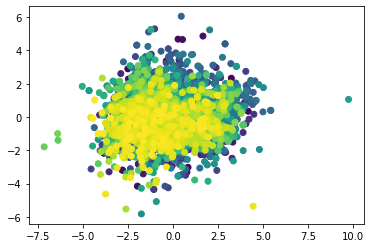

In [ ]:
# Principal Component Pattern Plot 1

plt.scatter(x=X_pp['PC1'],y=X_pp['PC2'], c=X_pp.index)

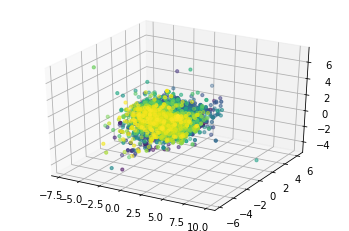

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_pp['PC1'],X_pp['PC2'],X_pp['PC3'], s=10, c = X_pp.index)
plt.show()

### biplot
- biplot = score plot + loading plot
  - 주성분과 원 데이터의 변수 간의 상관관계를 보여주는 그래프
  - 각 PC축에 가깝게 평행을 이루는 변수가 해당 PC에 영향을 가장 많이 주는 변수
  - 각 빨간선의 길이는 원변수의 분산을 표현하고, 길이가 길수록 분산이 큼을 의미한다.
  - 각 빨간선이 가까울 수록 서로 상관관계가 있다. 멀면 상관관계가 작다.

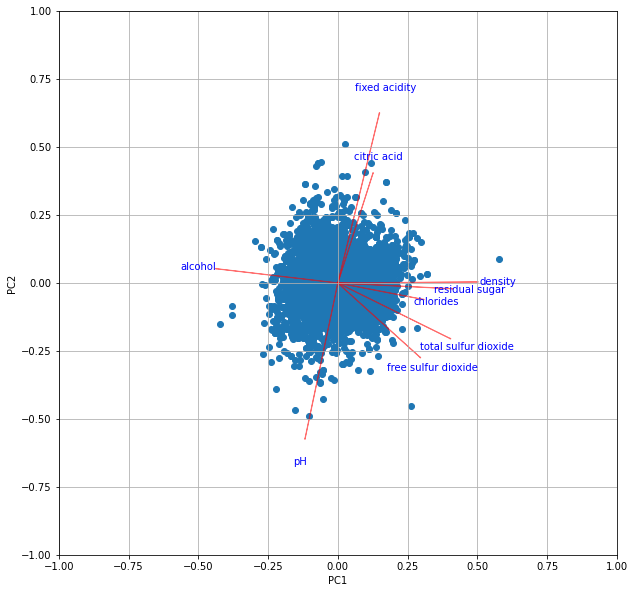

In [ ]:
def biplot(score,coeff,pcax,pcay,labels=None):
  plt.figure(figsize=(10,10))

  pca1=pcax-1
  pca2=pcay-1
  xs = score.iloc[:,pca1]
  ys = score.iloc[:,pca2]
  n=coeff.shape[0]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='b', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='b', ha='center', va='center')
  plt.xlim(-1,1) # 범위는 최대 1에서 최소 -1
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()

biplot(X_pp, pca.components_.T, 1, 2, labels=data_scale.columns)

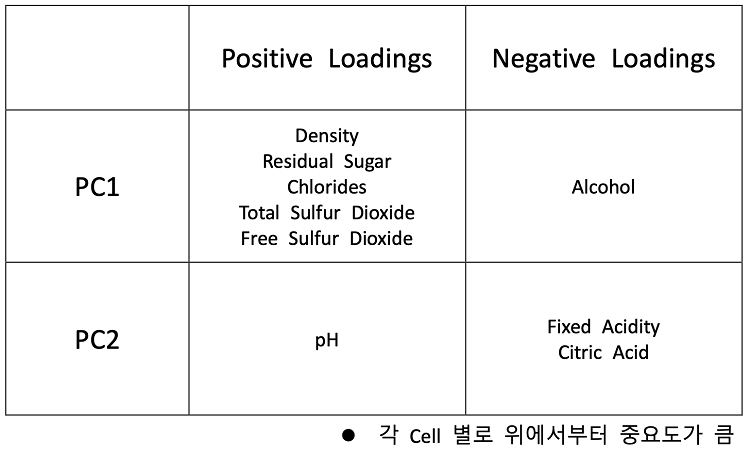

**위의 표를 통해 Loadings의 방향성과 관련성이 큰 PC에의 영향력을 나타냈다면,**

**추가로 각 loadings 값이 향하는 방향이 비슷한 항목 끼리 서로 상관관계가 있으므로,**

**다음과 같이 Positive하게 관계가 있거나 Negative하게 관련성이 높은 변수를 정리해볼 수 있다.**

- **`Density` & `Residual Sugar` & `Chlorides` ↔ `Alcohol`**
- **`Total Sulfur Dioxide`& `Free Sulfur Dioxide`**
- **`Fixed Acidity`& `Citric Acid` ↔ `pH`**

# **Factor Analysis**

## 조건 검정 : Bartlett test & KMO test

### Bartlett test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scale)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(22164.15749929021, 0.0)

요인분석에 앞서 첫 번째 조건으로 Bartlett test 실행 결과 p_value < 0.05로 상관관계 행렬이 단위 행렬이 아님을 보였다.  

### KMO test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_scale)
kmo_model # 0.4650822591331971 ~= 0.5

0.4650822591331971

**[참고]**
 다양한 방법으로 EDA를 진행해본 결과 현 방식으로 한 경우에 가장 높은 kmo_model 값을 달성했다.
 
비록 값이 일반적인 기준인 0.5에 미치지는 못하지만, 큰 차이를 보이는 값은 아니기 때문에 공통되는 요인이 적을 수는 있으나
요인분석을 진행하는 데 어려움이 따를 정도는 아니라고 판단된다.

*추가로 조교님 피드백을 받은 부분입니다. 이전에 kmo값을 올리기 위해 조건을 다르게 실험했던 파일의 경우 별도 첨부하였습니다.

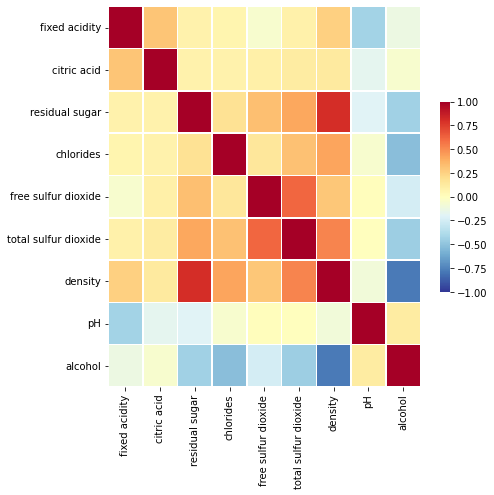

In [ ]:
fig, ax = plt.subplots( figsize=(7,7) )
sns.heatmap(data_scale.corr(), 
            cmap = 'RdYlBu_r', 
            # annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

각 변수간의 상관관계를 heatmap을 이용해 나타나면 위와 같이 일부 진한 주황색이 보이는 것을 확인할 수 있다.

## FA 개수 선택 : 3, 4, 5 의 경우를 모두 고려 (EFA 방식)

PCA과정에서는 Eigen value가 1 이상인 경우에서 3개의 PC가, 그래프의 기울기로는 3개의 PC가, 누적 80%의 variance를 설명하는 경우에는 5개의 PC가 적절하다고 도출되었고, 이 중 공통적으로 등장한 3을 PC의 개수로 선정하여 진행하였다.

따라서 Factor Analysis의 경우는 마찬가지로 3~5 사이의 모든 가능성을 1."varimax" 방식과 2."promax" 방식으로 탐색해보고, 그 중 가장 요인적재량에 따라 Naming이 적절하게 이루어 질 수 있는 Factor의 개수를 탐색해보고자 한다.

탐색의 순서는 큰 수인 5부터 진행하여 하나씩 그 수를 줄여가며 결과를 도출해보려 한다.

## 다각적 방법으로 EFA 진행


### Orthogonal Rotation 과 Oblique Roation

인자 간의 약간의 상관관계를 용인하는 Oblique Rotation의 경우가 더 좋은 성능을 나타낸다고 알려져 있다. 반대로 Orthogonal Rotation의 경우 가장 전통적이고 관습적인 방법으로, 회전된 인자들이 서로 상관되지 않도록 제한하는 방법이다.

다만 두 방식의 성능을 속단할 수 없기 때문에 각 방식의 대표주자라고 할 수 있는

`varimax` 방식과 `promax` 방식을 활용해 요인의 개수에 따른 EFA를 진행하였다.

### Factor Analysis의 서로 다른 Rotation 접근을 위한 함수 정의

Factor Analysis를 통해 얻은 Factor들이 각각 대표하는 Feature들을 보다 명확히 표현하기 위해 아래의
`meaningfulFactor()`,`relationalFactor()`,`wrap()` 함수를 구현했고,

 각 요인과 Factor의 factor loadings 값이 0.5 이상인 경우를 찾아 DataFrame으로 반환되도록 했다.

 Factor loadings 값은 일반적으로 0.5보다 큰 경우 관련성이 크다고 판단할 수 있고, 최소 0.3 이상인 경우에도 관련성이 높다고 판단된다.

 Factor의 개수에 따라 Orthogonal rotation 방식과 Oblique rotation 방식의 결과를 비교하고, Factor에 관련 있는 변수를 나타내보면
 
 아래의 Step 3-1, 3-2, 3-3 과 같다.

In [ ]:
# factor loadings 값이 0.5 이상인 Factor와 Feature를 연결하는 함수
def meaningfulFactor(df, factor):
  return (df.index[df[factor]>=0.5].tolist())

In [ ]:
# 여러 개의 Factor와 관련있는 Feature를 mapping해서 DataFrame 객체로 반환하는 함수
def relationalFactor(df, num):
  li = []
  names = []
  for i in range(0,num):
    li.append(meaningfulFactor(df, 'Factor{}'.format(str(i+1))))
    names.append("Factor{}".format(i+1))
  li = pd.DataFrame(li)
  li.index = names
  return li

In [ ]:
# 관련된 Feature의 최대 개수에 맞추어 column명을 설정해주는 함수
def wrap(content):
  num = len(content.columns)
  col_name = list(content.columns.values)
  for j in range(0, num):
    col_name[j] = "Related Feature {}".format(j+1)
  content.columns = col_name
  return content

## Step 3-1. Factor Analysis ( 5 Factors )

### 1) Orthogonal rotation인 varimax를 활용한 FA

In [ ]:
fa_o5 = FactorAnalyzer(n_factors=5, rotation = "varimax")
fa_o5.fit(data_scale)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [ ]:
fa_o5_result_loading = pd.DataFrame(fa_o5.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'],
                                 index=data_scale.columns)
fa_o5_result_loading

,Factor1,Factor2,Factor3,Factor4,Factor5
fixed acidity,0.074970,0.045377,-0.092563,0.915494,-0.150296
citric acid,0.033587,0.034494,0.099991,0.328823,-0.071977
residual sugar,0.182696,0.917949,0.243698,0.035637,-0.115315
chlorides,0.558521,0.047784,0.139965,0.048386,-0.015270
free sulfur dioxide,0.097273,0.131320,0.782818,0.007161,-0.003684
total sulfur dioxide,0.345964,0.198298,0.713228,0.138600,0.052241
density,0.643700,0.702479,0.184011,0.230587,0.053817
pH,-0.043122,-0.078339,0.035735,-0.298652,0.946872
alcohol,-0.871599,-0.256142,-0.145395,-0.045882,0.058042


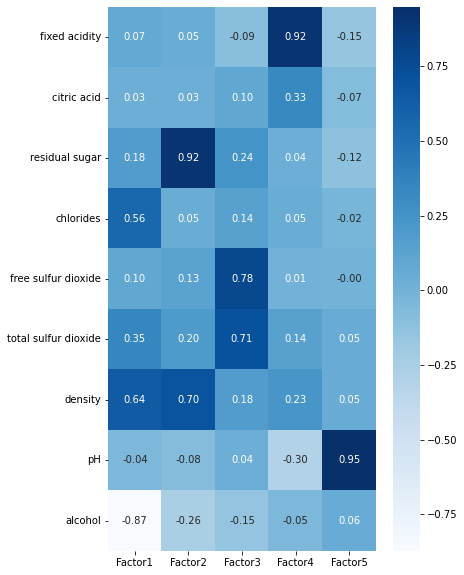

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_o5_result_loading, cmap="Blues", annot=True, fmt='.2f')

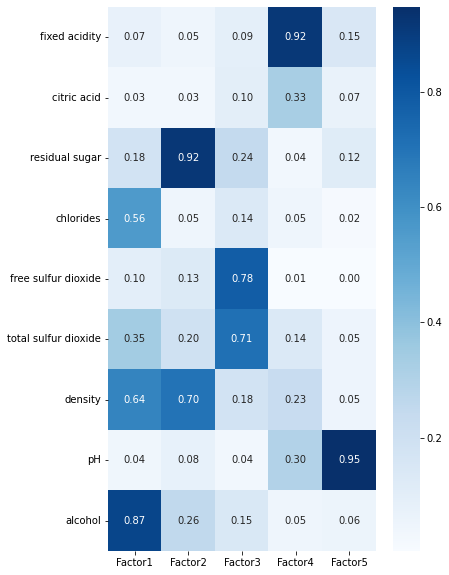

In [ ]:
# 시각화(절댓값)
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_o5_result_loading), cmap="Blues", annot=True, fmt='.2f')

### 2) Oblique rotation인 promax를 활용한 FA

Oblique Rotation로 factor loadings 값을 도출해보면 간혹 1보다 큰 수가 등장하기도 한다.

이는 잘못된 결과가 아니며, 매우 높은 관련성을 보일 때 나타난다.

In [ ]:
fa_ob5 = FactorAnalyzer(n_factors=5, rotation = "promax")
fa_ob5.fit(data_scale)

FactorAnalyzer(n_factors=5, rotation_kwargs={})

In [ ]:
fa_ob5_result_loading = pd.DataFrame(fa_ob5.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'],
                                 index=data_scale.columns)
fa_ob5_result_loading

,Factor1,Factor2,Factor3,Factor4,Factor5
fixed acidity,0.012214,-0.030658,-0.188745,0.971399,0.007748
citric acid,0.027007,-0.010654,0.078922,0.332955,-0.020664
residual sugar,0.151819,1.040454,0.065362,-0.092294,-0.080203
chlorides,-0.624063,-0.114521,0.041508,-0.015601,-0.017657
free sulfur dioxide,0.080978,0.017122,0.837906,-0.063189,-0.025305
total sulfur dioxide,-0.186618,0.033380,0.685093,0.075956,0.061991
density,-0.453855,0.646973,-0.073879,0.150026,0.122889
pH,0.071085,-0.055414,0.014683,-0.049403,0.967325
alcohol,0.929197,-0.058007,0.048384,0.075372,0.057545


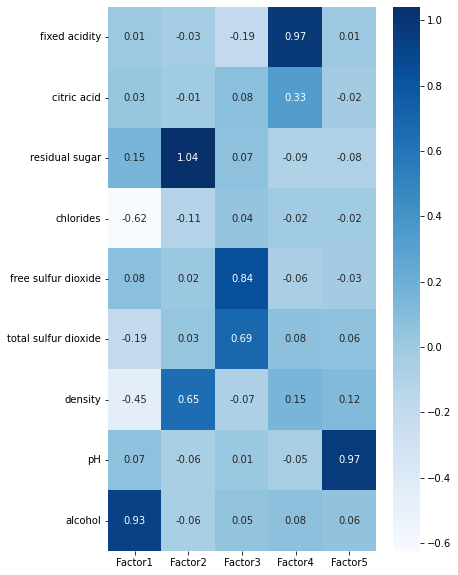

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_ob5_result_loading, cmap="Blues", annot=True, fmt='.2f')

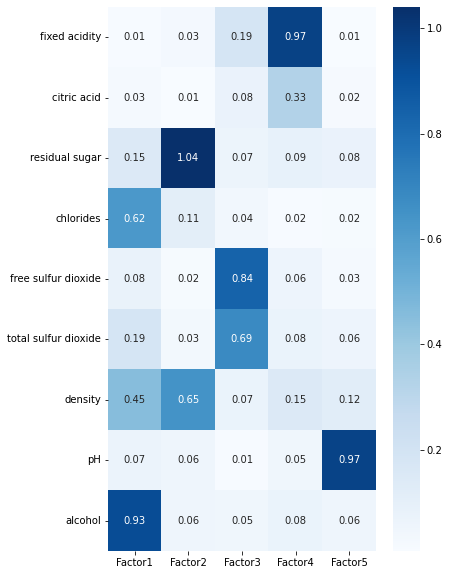

In [ ]:
# 시각화(절댓값)
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_ob5_result_loading), cmap="Blues", annot=True, fmt='.2f')

### 3) 누적 분산 설명 비율 - 5 Factors : 71.8% (Orthogonal Rotation이 1.3% 우세)

**Orthogonal Rotation의 Cumulative Variance**

In [ ]:
fa_o5.get_factor_variance() # 각 factor의 variance
fa5_result_fromLoading = pd.DataFrame(fa_o5.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4','Factor5'])
fa5_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa5_result_fromLoading

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,1.657120,1.469952,1.275320,1.113596,0.946874
Proportion Var,0.184124,0.163328,0.141702,0.123733,0.105208
Cumulative Var,0.184124,0.347452,0.489155,0.612887,0.718096


Orthogonal Rotation 방식으로 5개의 Factor를 가지고 FA를 진행한 경우 분산 설명 비율 약 **71.8%**를 얻었다.(소수 셋째자리까지 반올림)

**Oblique Rotation의 Cumulative Variance**

In [ ]:
fa_ob5.get_factor_variance() # 각 factor의 variance
fa_ob5_result_fromLoading = pd.DataFrame(fa_ob5.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4','Factor5'])
fa_ob5_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_ob5_result_fromLoading

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,1.529210,1.523131,1.227302,1.103629,0.965846
Proportion Var,0.169912,0.169237,0.136367,0.122625,0.107316
Cumulative Var,0.169912,0.339149,0.475516,0.598141,0.705458


Oblique Rotation 방식으로 5개의 Factor에 대해 FA를 진행하는 경우 **70.5%**의 분산 설명 비율을 갖는다.(소수 셋째 자리 까지 반올림)

이는 **Orthogonal한 방식이 Oblique방식보다 약 1.3% 높은 수치**를 기록했다.

변수 간의 상관관계에 엄격한 Oblique Rotation 방식이 더 좋은 설명력을 가진다고 해석해볼 수 있다.

즉, **Factor 5개에 대한 최종 분산 설명 비율은 71.8%**이다.


### 4) Factor에 의해 공통적으로 설명되는 Feature 확인

In [ ]:
# Orthogonal
df_orth5 = np.abs(fa_o5_result_loading)
orth5 = wrap(relationalFactor(df_orth5, 5))
orth5

,Related Feature 1,Related Feature 2,Related Feature 3
Factor1,chlorides,density,alcohol
Factor2,residual sugar,density,None
Factor3,free sulfur dioxide,total sulfur dioxide,None
Factor4,fixed acidity,None,None
Factor5,pH,None,None


In [ ]:
# Oblique
df_obli5 = np.abs(fa_ob5_result_loading)
obli5 = wrap(relationalFactor(df_obli5, 5))
obli5

,Related Feature 1,Related Feature 2
Factor1,chlorides,alcohol
Factor2,residual sugar,density
Factor3,free sulfur dioxide,total sulfur dioxide
Factor4,fixed acidity,None
Factor5,pH,None


위에 시각화한 두 표를 참고하면 Orthogonal rotation의 결과로 얻어진 `orth5`에서 Factor1에 density가 포함되는 부분을 제외하면

`orth5`와 `obli5`의 구성이 거의 동일함을 확인가능하다.

3)에서 Factor가 5개인 경우에는 Orthogonal한 방식이 누적 분산 비율을 더잘 설명하므로

`orth5` 기준으로 1차적으로 종합 해석해보자면 다음과 같다.

- Factor1 : Chlorides & Density & Alcohol
- Factor2 : Residual Sugar & Density
- Factor3 : Free Sulfur Dioxide & Total Sulfur Dioxide
- Factor4 : Fixed Acidity
- Factor5 : pH



다만 의미상으로 Factor4와 Factor5가 같은 성격의 요인이라고 쉽게 판단할 수 있기 때문에

5개를 요인으로 고려하는 것은 최선의 선택이 아닐 수 있다.

## Step 3-2. Factor Analysis ( 4 Factors )

### 1) Orthogonal rotation인 varimax를 활용한 FA

In [ ]:
fa_o4 = FactorAnalyzer(n_factors=4, rotation = "varimax")
fa_o4.fit(data_scale)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [ ]:
fa_o4_result_loading = pd.DataFrame(fa_o4.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4'],
                                 index=data_scale.columns)
fa_o4_result_loading

,Factor1,Factor2,Factor3,Factor4
fixed acidity,0.081748,-0.027714,-0.041442,0.991754
citric acid,0.033288,0.021183,0.110531,0.324422
residual sugar,0.207672,0.943157,0.246472,0.116758
chlorides,0.546489,0.032114,0.151704,0.046506
free sulfur dioxide,0.107572,0.148608,0.663278,-0.018585
total sulfur dioxide,0.327754,0.136973,0.852324,0.091672
density,0.664503,0.611243,0.238327,0.211535
pH,-0.036176,-0.116386,0.060120,-0.427187
alcohol,-0.889500,-0.225282,-0.149711,-0.071050


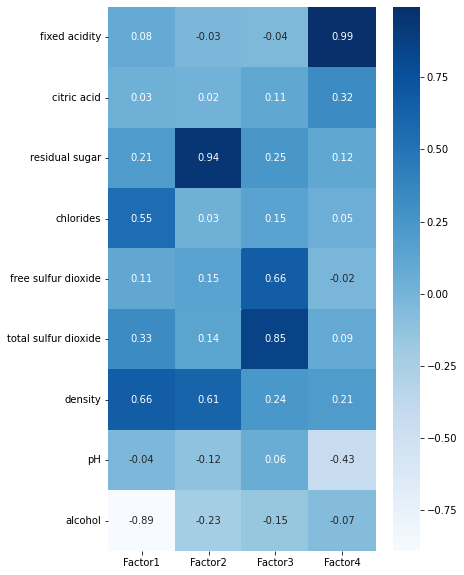

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_o4_result_loading, cmap="Blues", annot=True, fmt='.2f')

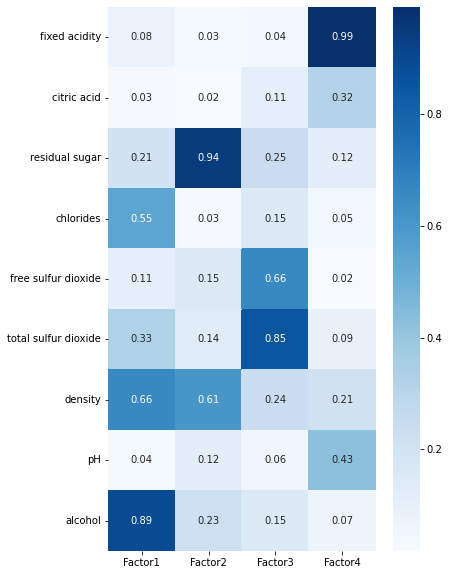

In [ ]:
# 시각화(절댓값)
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_o4_result_loading), cmap="Blues", annot=True, fmt='.2f')

### 2) Oblique rotation인 promax를 활용한 FA

Oblique Rotation로 factor loadings 값을 도출해보면 간혹 1보다 큰 수가 등장하기도 한다.

이는 잘못된 결과가 아니며, 매우 높은 관련성을 보일 때 나타난다.

In [ ]:
fa_ob4 = FactorAnalyzer(n_factors=4, rotation = "promax")
fa_ob4.fit(data_scale)

FactorAnalyzer(n_factors=4, rotation_kwargs={})

In [ ]:
fa_ob4_result_loading = pd.DataFrame(fa_ob4.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4'],
                                 index=data_scale.columns)
fa_ob4_result_loading

,Factor1,Factor2,Factor3,Factor4
fixed acidity,0.037161,-0.140957,1.025021,-0.078374
citric acid,-0.018367,-0.025852,0.330338,0.106478
residual sugar,-0.114869,1.036874,-0.036518,0.083250
chlorides,0.600895,-0.108178,-0.004936,0.042746
free sulfur dioxide,-0.071275,0.077919,-0.050323,0.692531
total sulfur dioxide,0.141563,-0.018354,0.046287,0.854208
density,0.526725,0.529261,0.070208,0.022168
pH,0.013207,-0.096815,-0.422450,0.100519
alcohol,-0.946837,-0.041681,0.038469,0.064843


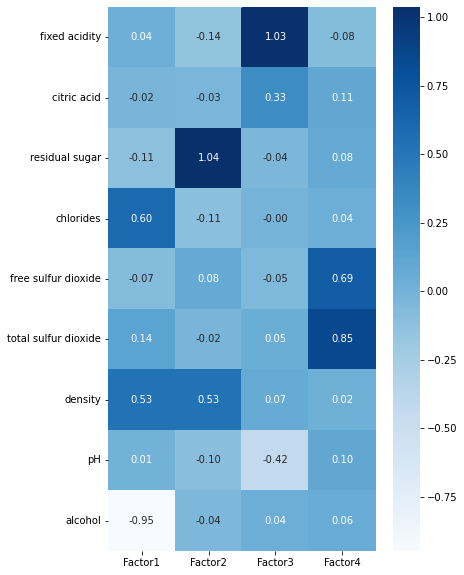

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_ob4_result_loading, cmap="Blues", annot=True, fmt='.2f')

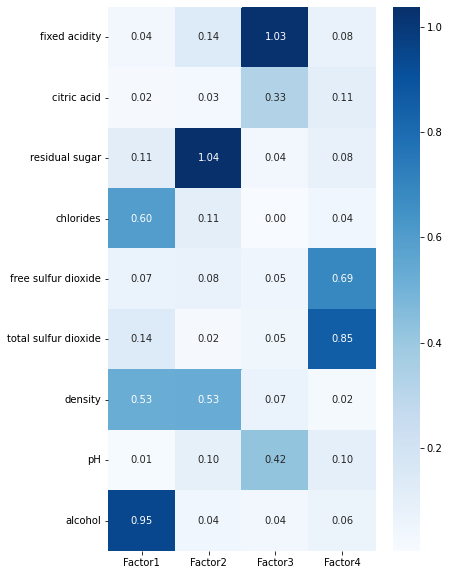

In [ ]:
# 시각화(절댓값)
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_ob4_result_loading), cmap="Blues", annot=True, fmt='.2f')

### 3) 누적 분산 설명 비율 - 4 Factors : 64.1% (Orthogonal Rotationdl 2.1% 우세)

**Orthogonal Rotation의 Cumulative Variance**

In [ ]:
fa_o4.get_factor_variance() # 각 factor의 variance
fa_o4_result_fromLoading = pd.DataFrame(fa_o4.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4'])
fa_o4_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_o4_result_fromLoading

,Factor1,Factor2,Factor3,Factor4
SS Loadings,1.702645,1.370556,1.346919,1.345654
Proportion Var,0.189183,0.152284,0.149658,0.149517
Cumulative Var,0.189183,0.341467,0.491125,0.640642


Orthogonal Rotation 방식으로 4개의 Factor로 FA를 진행한 결과 약 **64.1%**의 분산 설명 비율을 갖는다.(소수 셋째 자리 까지 반올림)

**Oblique Rotation의 Cumulative Variance**

In [ ]:
fa_ob4.get_factor_variance() # 각 factor의 variance
fa_ob4_result_fromLoading = pd.DataFrame(fa_ob4.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4'])
fa_ob4_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_ob4_result_fromLoading

,Factor1,Factor2,Factor3,Factor4
SS Loadings,1.575223,1.404984,1.350698,1.250309
Proportion Var,0.175025,0.156109,0.150078,0.138923
Cumulative Var,0.175025,0.331134,0.481212,0.620135


Oblique Rotation 방식으로 4개의 Factor에 대해 FA를 진행하는 경우 **62.0%**의 분산 설명 비율을 갖는다.(소수 셋째 자리 까지 반올림)

이번에는 **Orthogonal한 방식이 Oblique 방식보다 약 2.1% 높은 수치**를 보였다.

변수 간의 독립성을 가정한 Oblique Rotation 방식이 미세하게 더 좋은 성능을 발휘했다고 해석해볼 수 있다.

즉, **Factor 4개에 대한 최종 분산 설명력은 64.1%**이다.


### 4) Factor에 의해 공통적으로 설명되는 Feature 확인

In [ ]:
# Orthogonal
df_orth4 = np.abs(fa_o4_result_loading)
orth4 = wrap(relationalFactor(df_orth4, 4))
orth4

,Related Feature 1,Related Feature 2,Related Feature 3
Factor1,chlorides,density,alcohol
Factor2,residual sugar,density,None
Factor3,free sulfur dioxide,total sulfur dioxide,None
Factor4,fixed acidity,None,None


In [ ]:
# Oblique
df_obli4 = np.abs(fa_ob4_result_loading)
obli4 = wrap(relationalFactor(df_obli4, 4))
obli4

,Related Feature 1,Related Feature 2,Related Feature 3
Factor1,chlorides,density,alcohol
Factor2,residual sugar,density,None
Factor3,fixed acidity,None,None
Factor4,free sulfur dioxide,total sulfur dioxide,None


위에 시각화한 두 표를 참고하면 Factor의 순서만 다를 뿐,

`orth4`와 `obli4`의 구성이 동일함을 확인가능하다.

1차적으로 종합 해석해보자면 다음과 같다. (Orthogonal 회전 기준)

- Factor1 : Chlorides & Density & Alcohol
- Factor2 : Residual Sugar & Density
- Factor3 : Fixed Acidity
- Factor4 : Free Sulfur Dioxide


즉, Factor의 개수가 4개인 경우에는 5개일 때 pH와 fixed acidity 값이 다른 요인으로 분류되는 것과 같은 상황은 등장하지 않았다.

다만 'density'가 두 개의 Factor에 동시에 관련이 높은 결과가 나왔고, PCA에서 PC의 개수가 3개로 설정되었기 때문에 요인이 3개인 경우에 대해서도 확인을 해볼 필요가 있다.

## Step 3-3. Factor Analysis ( 3 Factors )

### 1) Orthogonal rotation인 varimax를 활용한 FA

In [ ]:
fa_o3 = FactorAnalyzer(n_factors=3, rotation = "varimax")
fa_o3.fit(data_scale)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
fa_o3_result_loading = pd.DataFrame(fa_o3.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=data_scale.columns)
fa_o3_result_loading

,Factor1,Factor2,Factor3
fixed acidity,0.078147,-0.060721,0.888995
citric acid,0.051443,0.102472,0.349658
residual sugar,0.628685,0.224635,0.119541
chlorides,0.465029,0.091836,0.040320
free sulfur dioxide,0.175134,0.920125,-0.006390
total sulfur dioxide,0.463891,0.586485,0.072589
density,0.983125,0.145407,0.192600
pH,-0.076038,0.036621,-0.467885
alcohol,-0.782631,-0.112179,-0.073444


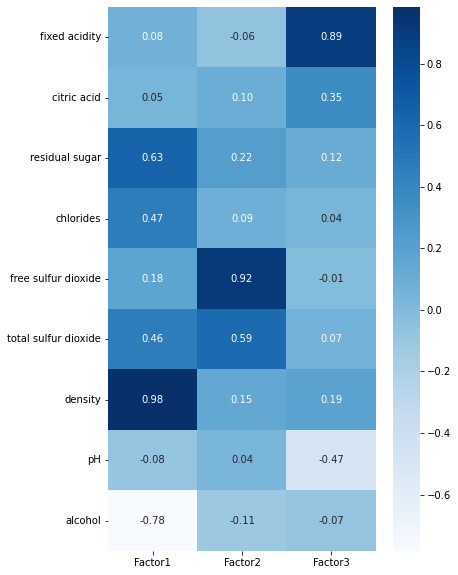

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_o3_result_loading, cmap="Blues", annot=True, fmt='.2f')

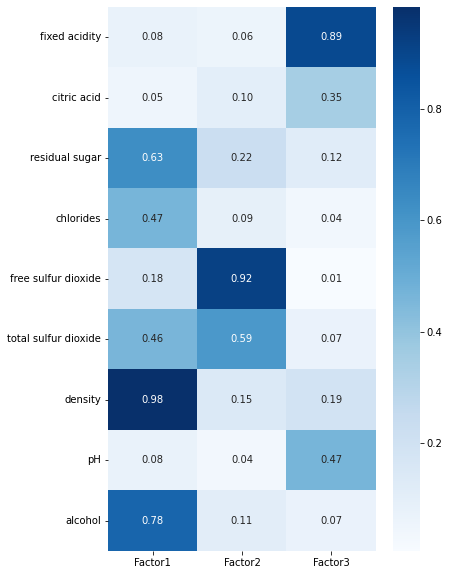

In [ ]:
# 시각화(절댓값)
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_o3_result_loading), cmap="Blues", annot=True, fmt='.2f')

### 2) Oblique rotation인 promax를 활용한 FA

Oblique Rotation로 factor loadings 값을 도출해보면 간혹 1보다 큰 수가 등장하기도 한다.

이는 잘못된 결과가 아니며, 매우 높은 관련성을 보일 때 나타난다.

In [ ]:
fa_ob3 = FactorAnalyzer(n_factors=3, rotation = "promax")
fa_ob3.fit(data_scale)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
fa_ob3_result_loading = pd.DataFrame(fa_ob3.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=data_scale.columns)
fa_ob3_result_loading

,Factor1,Factor2,Factor3
fixed acidity,-0.012175,-0.104824,0.904898
citric acid,-0.027116,0.097026,0.352290
residual sugar,0.614334,0.096519,0.032672
chlorides,0.487985,-0.012063,-0.024976
free sulfur dioxide,-0.134127,1.000857,-0.036421
total sulfur dioxide,0.302999,0.549000,0.005744
density,1.034500,-0.082815,0.058041
pH,-0.034830,0.069135,-0.471325
alcohol,-0.835850,0.068501,0.036050


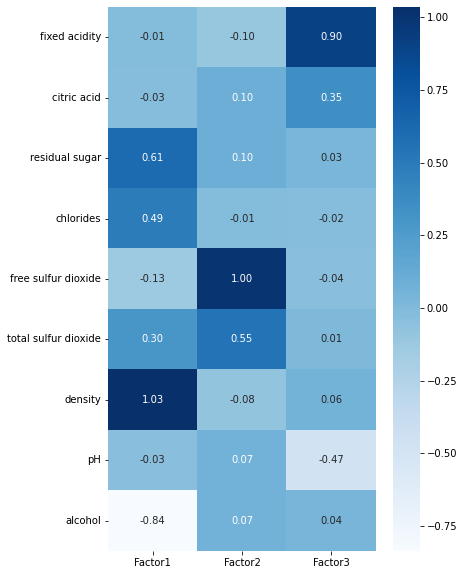

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_ob3_result_loading, cmap="Blues", annot=True, fmt='.2f')

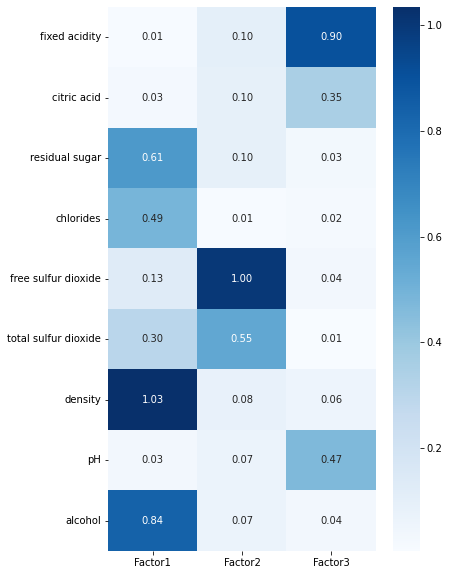

In [ ]:
# 시각화(절댓값)
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_ob3_result_loading), cmap="Blues", annot=True, fmt='.2f')

### 3) 누적 분산 설명 비율 - 3 Factors : 55.8% (Oblique Rotation이 0.8% 우세)

**Orthogonal Rotation의 Cumulative Variance**

In [ ]:
fa_o3.get_factor_variance() # 각 factor의 variance
fa_o3_result_fromLoading = pd.DataFrame(fa_o3.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3'])
fa_o3_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_o3_result_fromLoading

,Factor1,Factor2,Factor3
SS Loadings,2.450945,1.298745,1.195203
Proportion Var,0.272327,0.144305,0.132800
Cumulative Var,0.272327,0.416632,0.549433


Orthogonal Rotation 방식으로 3개의 Factor로 FA를 진행한 결과 약 **55%**의 분산 설명 비율을 갖는다.(소수 셋째 자리 까지 반올림)

**Oblique Rotation의 Cumulative Variance**

In [ ]:
fa_ob3.get_factor_variance() # 각 factor의 variance
fa_ob3_result_fromLoading = pd.DataFrame(fa_ob3.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3'])
fa_ob3_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_ob3_result_fromLoading

,Factor1,Factor2,Factor3
SS Loadings,2.496268,1.349311,1.172815
Proportion Var,0.277363,0.149923,0.130313
Cumulative Var,0.277363,0.427287,0.557599


Oblique Rotation 방식으로 4개의 Factor에 대해 FA를 진행하는 경우 **55.8%**의 분산 설명 비율을 갖는다.(소수 셋째 자리 까지 반올림)

이는 **Orthogonal한 방식보다 약 0.8% 높은 수치**이므로 변수 간의 약간의 상관관계를 가정한 Oblique Rotation 방식이 미세하게 더 좋은 성능을 발휘했다고 해석해볼 수 있다.

즉, **Factor 3개에 대한 누적 분산 설명 비율은 55.8%**이다.


### 4) Factor에 의해 공통적으로 설명되는 Feature 확인

In [ ]:
# Orthogonal
df_orth3 = np.abs(fa_o3_result_loading)
orth3 = wrap(relationalFactor(df_orth3, 3))
orth3

,Related Feature 1,Related Feature 2,Related Feature 3
Factor1,residual sugar,density,alcohol
Factor2,free sulfur dioxide,total sulfur dioxide,None
Factor3,fixed acidity,None,None


In [ ]:
# Oblique
df_obli3 = np.abs(fa_ob3_result_loading)
obli3 = wrap(relationalFactor(df_obli3, 3))
obli3

,Related Feature 1,Related Feature 2,Related Feature 3
Factor1,residual sugar,density,alcohol
Factor2,free sulfur dioxide,total sulfur dioxide,None
Factor3,fixed acidity,None,None


3개의 요인으로 FA를 진행한 결과 두 방법 모두에서 동일한 결과가 등장했음을 알 수 있다.

`orth3`와 `obli3`의 구성이 일치함을 확인가능하다.

1차적으로 종합 해석해보자면 다음과 같다.

- Factor1 : Residual Sugar & Density & Alcohol
- Factor2 : Free Sulfur Dioxide & Total Sulfur Dioxide
- Factor3 : Fixed Acidity	

## Step 4. Final Results


### **1. Orthogonal Rotation** vs **Oblique Rotation**

두 요인분석의 결과, Factor의 개수애 따라 각 경우에 누적 분산 설명 비율이 더 우수한 방식이 달라짐을 확인했다.

 **"적은 요인에서 Oblique Rotation이 더 많은 Cumulative Variance를 설명하고,**

 **많은 요인에서 Orthogonical Rotation이 더 많은 Cumulative Variance를 설명했다."**

Factor 3에서 차이가 발생한 이유는 변수들 간의 상관관계를 인정하는

Oblique Rotation 방식이 적은 요인만을 가지고도 상관관계가 없다고 가정하는 Orthogonal Rotation에 비해

 더 많은 부분을 설명할 수 있었기 때문이라고 추측 가능하다.

### **2. Factor 개수의 최종 설정 : 3개**

분산 설명 비율과 무관하게 각 Factor에 Feature들이 할당되었던 결과를 바탕으로 판단해볼 수 있다.

각 요인의 개수 별로 분산 설명 비율이 더 컸던 방식의 결과를 불러오면 아래와 같다.

In [ ]:
# 요인 3개
obli3

,Related Feature 1,Related Feature 2,Related Feature 3
Factor1,residual sugar,density,alcohol
Factor2,free sulfur dioxide,total sulfur dioxide,None
Factor3,fixed acidity,None,None


3개의 Factor인 경우에는 하나의 변수명이 여러 개의 Factor에 동시에 높은 관련성을 보이는 경우가 없다.

즉, 변수들의 공통적인 특성이 고르게 반영된 요인들이라고 판단할 수 있다.

In [ ]:
# 요인 4개
orth4

,Related Feature 1,Related Feature 2,Related Feature 3
Factor1,chlorides,density,alcohol
Factor2,residual sugar,density,None
Factor3,free sulfur dioxide,total sulfur dioxide,None
Factor4,fixed acidity,None,None


4개의 Factor인 경우에는 5개의 Factor인 경우보다는 덜하지만

여전히 'density'라는 변수가 Factor1과 Factor2에 동시에 관련있다고 나오는 결과를 확인할 수 있다.

In [ ]:
# 요인 5개
orth5

,Related Feature 1,Related Feature 2,Related Feature 3
Factor1,chlorides,density,alcohol
Factor2,residual sugar,density,None
Factor3,free sulfur dioxide,total sulfur dioxide,None
Factor4,fixed acidity,None,None
Factor5,pH,None,None


5개의 Factor인 경우에는 'density'라는 변수가 Factor1과 Factor2에 동시에 관련성이 높은 것을 알 수 있다.

또한 Factor4의 'fixed acidity'와 Factor5의 'pH'는 서로 다른 요인으로 분리되어 있지만 그 의미를 생각해보면 공통된 특성을 가지는 데이터라고 생각할 수 있다.

즉, 이는 특정 변수들을 설명하기 위해 공통적인 요인을 설정하는 FA의 의미상 적절하지 않은 경우라고 판단해볼 수 있다.

따라서 종합적으로 고려해 보았을 때 Factor의 개수로는 3개가 가장 적절하다고 판단 가능하다.

## **Step 5. Factor naming & Comprehension**

### 최초 Data Feature에 대한 Background Knowledge

fixed.acidity(결합산) : 와인의 산도를 제어한다. 

volatile.acidity(휘발산) : 와인의 향에 연관이 많다. 

citric.acid(구연산) : 와인의 신선함을 유지시켜주는 역할을 하며, 산성화에 연관을 미친다. 

residual.sugar(잔여 설탕) : 와인의 단맛을 올려준다. 

chlorides(염소) : 와인의 짠맛과 신맛을 좌우하는 성분이다. 

free.sulfur.dioxide / total.sulfur.dioxide / sulphates(황 화합물) : 특정 박테리아와 효모를 죽여 와인의 보관도를 높여준다. 

density(밀도) : 바디의 높고 낮음을 표현하는 와인의 바디감을 의미한다. 

pH(산성도) : 와인의 신맛의 정도를 나타낸다. 

alcohol(알코올) : 와인에 단맛을 주며 바디감에 영향을 준다.

Factor 5개에 대해 각각 진행한 0.5 이상의 상관관계를 갖는 대응되는 Feature 이름을 `fa5` 에 저장했으므로 이를 불러와 다시 확인을 해주면 아래와 같다. Related Feature1과 2의 순서는 상관계수 값의 크기와는 무관하다.

In [ ]:
obli3

,Related Feature 1,Related Feature 2,Related Feature 3
Factor1,residual sugar,density,alcohol
Factor2,free sulfur dioxide,total sulfur dioxide,None
Factor3,fixed acidity,None,None


### Factor 이름 결정

- **Factor1** : **"와인의 점성",  Viscosity**

 residual sugar, density, alcohol과 높은 관련성을 보인다. residual sugar는 단순히 단맛으로 이해될 수도 있지만 남아 있는 설탕성분은 와인의 점성에도 영향을 미친다. 또한 density에 따라 body감이 달라지기도 하고, 실제로 알코올은 점도를 결정하는 데 중요한 요인으로 작용한다고 알려져 있다. Factor1은 **"와인의 점성에 영향을 주는 요인"**이라고 생각해볼 수 있다.
 
- **Factor2** : **"와인의 보관도", Storage**

  dioxide류의 feature 둘이 관련된 것을 보아 **"와인의 보관도에 영향을 주는 요인"**임을 알 수 있다. 오랫동안 보관이 가능한 와인은 시간이 흐름에 따라 그 희소성으로 인해 그 가치가 지속적으로 증가할 가능성이 매우 크다.

- **Factor3** : **"와인의 산미", Acidity**
 
 와인의 산도를 제어하는 결합산이 관련된 것을 보아 **"와인의 산미에 영향을 주는 요인"**으로 생각해볼 수 있다. 와인은 기본적으로 과일을 발효시켜 만든 술이기 때문에 그 산도에 따라 개인적 선호도에 영향을 미칠 수 있다.


**해당 Factor Name을 반영하여 Factor Analysis가 적용된 데이터셋을 불러오면 아래와 같다.**

In [ ]:
# Factor Analysis가 적용된 dataset (scaled)
X_f = fa_ob3.fit_transform(data_scale)
X_ff = pd.DataFrame(X_f[:,:3], 
                    columns = ['Viscosity','Storage','Acidity'], 
                    index = data_scale.index)
X_ff

,Viscosity,Storage,Acidity
0,2.959390,1.054336,0.446445
1,0.435198,-1.099668,-0.815616
2,-0.698699,-0.367415,1.336040
3,0.153440,0.766831,0.491379
4,0.153440,0.766831,0.491379
...,...,...,...
4893,-0.768382,-0.737298,-0.855699
4894,-0.009248,1.054209,-0.011983
4895,0.297277,-0.265694,-0.479970
4896,-1.454069,-1.015469,-1.677689


이를 score plot으로 시각화해보면 다음과 같다.

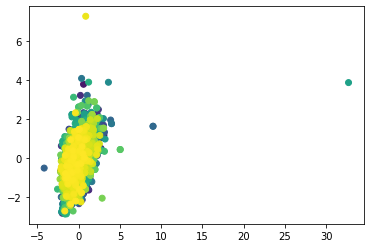

In [ ]:
# 2D : Acidity, Sweetness
plt.scatter(x=X_ff['Viscosity'],y=X_ff['Storage'], c=X_ff.index)

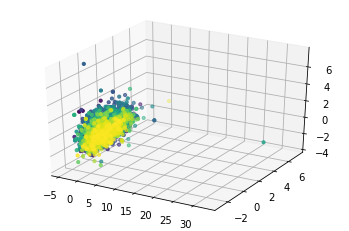

In [ ]:
# 3D : Acidity, Sweetness, Alcohol
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_ff['Viscosity'],X_ff['Storage'],X_ff['Acidity'], s=10, c = X_ff.index)
plt.show()

## **정리**

따라서 white-winequality라는 12개의 특성을 가진 데이터셋에서 공통적으로 

와인의 특성을 설명하는 요인 3가지를 발견할 수 있었다.

요인 3가지는 아래와 같다.

- ### **와인의 점성**
- ### **와인의 보관도**
- ### **와인의 산미**
